<a href="https://colab.research.google.com/github/v4gadkari/BrainTumorCNN/blob/main/BrainTumorClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpim

In [ ]:
import tensorflow as tf

In [ ]:
!pip install sklearn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BrainTumors.zip to BrainTumors.zip


In [ ]:
import zipfile
import io
tumor_data = zipfile.ZipFile(io.BytesIO(uploaded['BrainTumors.zip']), 'r')
tumor_data.extractall()

In [ ]:
tumor_data.printdir()

In [ ]:
base_dir = '/content/'

#Set up training and testing directories
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')


#Bring in Training Images
train_glioma_tumor_dir = os.path.join(train_dir, 'glioma_tumor')
train_meningioma_tumor_dir = os.path.join(train_dir, 'meningioma_tumor')
train_no_tumor_dir = os.path.join(train_dir, 'no_tumor')
train_pituitary_tumor_dir = os.path.join(train_dir, 'pituitary_tumor')

#Bring in Testing Images
test_glioma_tumor_dir = os.path.join(test_dir, 'glioma_tumor')
test_meningioma_tumor_dir = os.path.join(test_dir, 'meningioma_tumor')
test_no_tumor_dir = os.path.join(test_dir, 'no_tumor')
test_pituitary_tumor_dir = os.path.join(test_dir, 'pituitary_tumor')


In [ ]:
print("Total Training Glioma Tumor Images:", len(os.listdir(train_glioma_tumor_dir)))
print("Total Training Meningioma Tumor Images:", len(os.listdir(train_meningioma_tumor_dir)))
print("Total Training No Tumor Images:", len(os.listdir(train_no_tumor_dir)))
print("Total Training Pituitary Tumor Images:", len(os.listdir(train_pituitary_tumor_dir)))

print("Total Test Glioma Tumor Images:", len(os.listdir(test_glioma_tumor_dir)))
print("Total Test Meningioma Tumor Images:", len(os.listdir(test_meningioma_tumor_dir)))
print("Total Test No Tumor Images:", len(os.listdir(test_no_tumor_dir)))
print("Total Test Pituitary Tumor Images:", len(os.listdir(test_pituitary_tumor_dir)))


Total Training Glioma Tumor Images: 826
Total Training Meningioma Tumor Images: 822
Total Training No Tumor Images: 395
Total Training Pituitary Tumor Images: 827
Total Test Glioma Tumor Images: 100
Total Test Meningioma Tumor Images: 115
Total Test No Tumor Images: 105
Total Test Pituitary Tumor Images: 74


In [ ]:
from sklearn.preprocessing import OneHotEncoder

classes = os.listdir(train_dir)

enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
train_glioma_fnames = os.listdir(train_glioma_tumor_dir)
train_meningioma_fnames = os.listdir(train_meningioma_tumor_dir)
train_noTumor_fnames = os.listdir(train_no_tumor_dir)
train_pituitary_fnames = os.listdir(train_pituitary_tumor_dir)



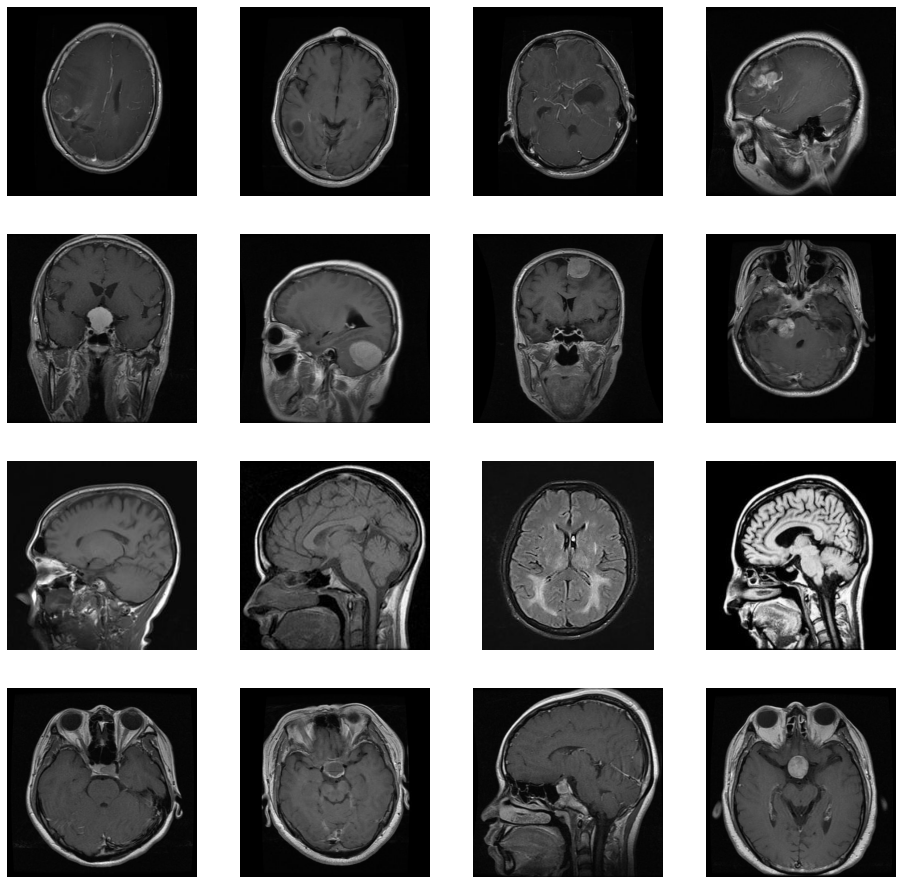

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4 * 4, 4 * 4)

#Time to display the first four rows of images for each class: Glioma Tumor, Meningioma Tumor, No Tumor, Pituitary Tumor
pic_index = 0
train_glioma_tumor = [os.path.join(train_glioma_tumor_dir, fname) for fname in train_glioma_fnames[pic_index:4]]
train_meningioma_tumor = [os.path.join(train_meningioma_tumor_dir, fname) for fname in train_meningioma_fnames[pic_index:4]]
train_no_tumor = [os.path.join(train_no_tumor_dir, fname) for fname in train_noTumor_fnames[pic_index:4]]
train_pituitary_tumor = [os.path.join(train_pituitary_tumor_dir, fname) for fname in train_pituitary_fnames[0:4]]


for i, img_path in enumerate(train_glioma_tumor+train_meningioma_tumor+train_no_tumor+train_pituitary_tumor):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#Time for image augmentation for pre processing

batch_size = 200
img_shape = 150

#Instantate a image data generator to handle the preprocessing
#Feed the training set into the generator, and create a validation dataset to use when we train the model 
#Split into 20% of the data

img_gen_train = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.5, width_shift_range=0.25, height_shift_range=0.25, rotation_range=45, validation_split=0.2)

train_img_gen = img_gen_train.flow_from_directory(train_dir, target_size=(img_shape, img_shape), class_mode="sparse", batch_size=batch_size, shuffle=True, subset='training')

valid_img_gen = img_gen_train.flow_from_directory(train_dir, target_size=(img_shape, img_shape), class_mode="sparse", batch_size=batch_size, subset='validation')


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [ ]:

#Examples of augmented pics
def plot_image(image): 
  plt.imshow(train_img_gen[0][0][image])




  

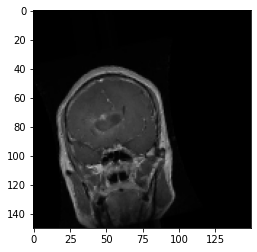

In [ ]:
plot_image(0)
  

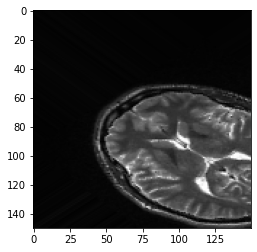

In [ ]:
plot_image(20)

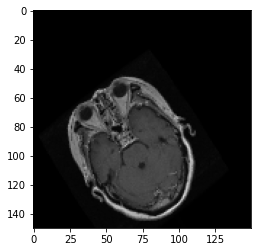

In [ ]:
plot_image(45)

In [ ]:
img_gen_test = ImageDataGenerator(rescale=1./255)

test_img_gen = img_gen_test.flow_from_directory(test_dir, target_size=(img_shape, img_shape), class_mode="sparse", batch_size=batch_size)

Found 394 images belonging to 4 classes.


In [ ]:
#Build CNN Model
model = Sequential([

#ConvLayer - Input
tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=(img_shape, img_shape, 3), activation='relu'),
#MaxPooling
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#ConvLayer
tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#MaxPooling
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#ConvLayer
tf.keras.layers.Conv2D(128,3, padding='same', activation='relu'),
#MaxPooling
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#ConvLayer
tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
#MaxPooling
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#Flatten
tf.keras.layers.Flatten(),
#Dropout
tf.keras.layers.Dropout(0.5),
#Dense
tf.keras.layers.Dense(256, activation='relu'),
#Droput
tf.keras.layers.Dropout(0.5),

#Dense - Output 
tf.keras.layers.Dense(4)
])

In [ ]:
#Compile the model

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
#Fit the model


history = model.fit(train_img_gen, epochs=100, steps_per_epoch=int(np.ceil(train_img_gen.n / float(batch_size))), validation_data=valid_img_gen, validation_steps=int(np.ceil(valid_img_gen.n / float(batch_size))))

Epoch 1/100
12/12 [==============================] - 22s 2s/step - loss: 1.3565 - accuracy: 0.3130 - val_loss: 1.3365 - val_accuracy: 0.3351
Epoch 2/100
12/12 [==============================] - 22s 2s/step - loss: 1.2801 - accuracy: 0.3670 - val_loss: 1.3683 - val_accuracy: 0.3229
Epoch 3/100
12/12 [==============================] - 22s 2s/step - loss: 1.2342 - accuracy: 0.4240 - val_loss: 1.2467 - val_accuracy: 0.3962
Epoch 4/100
12/12 [==============================] - 22s 2s/step - loss: 1.2476 - accuracy: 0.3888 - val_loss: 1.2304 - val_accuracy: 0.3735
Epoch 5/100
12/12 [==============================] - 22s 2s/step - loss: 1.1569 - accuracy: 0.4532 - val_loss: 1.2037 - val_accuracy: 0.4363
Epoch 6/100
12/12 [==============================] - 22s 2s/step - loss: 1.0991 - accuracy: 0.4893 - val_loss: 1.2274 - val_accuracy: 0.3944
Epoch 7/100
12/12 [==============================] - 21s 2s/step - loss: 1.0856 - accuracy: 0.5128 - val_loss: 1.1740 - val_accuracy: 0.4084
Epoch 8/100
1

In [ ]:
modelEval = model.evaluate(valid_img_gen)

#Performed well on training set with an accuracy of 88% and an error (loss) of 30%

3/3 [==============================] - 3s 998ms/step - loss: 0.6733 - accuracy: 0.7801


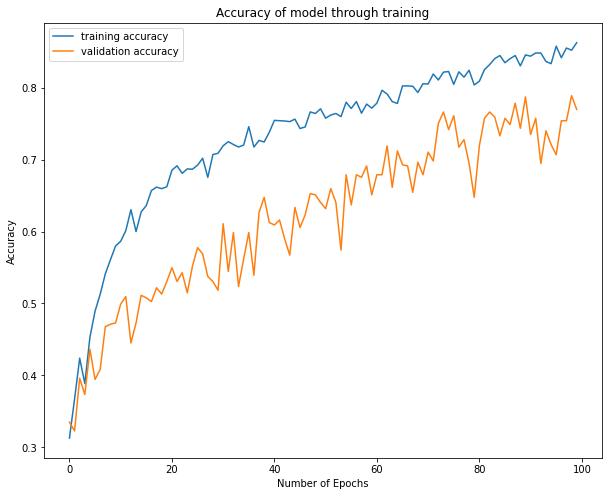

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 8))
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of model through training')
plt.plot(range(100), accuracy, label='training accuracy')
plt.plot(range(100), val_accuracy, label='validation accuracy')
plt.legend(loc='upper left')
plt.show()


#discrepancy in accuracy between the validation and training towards the end of the training process

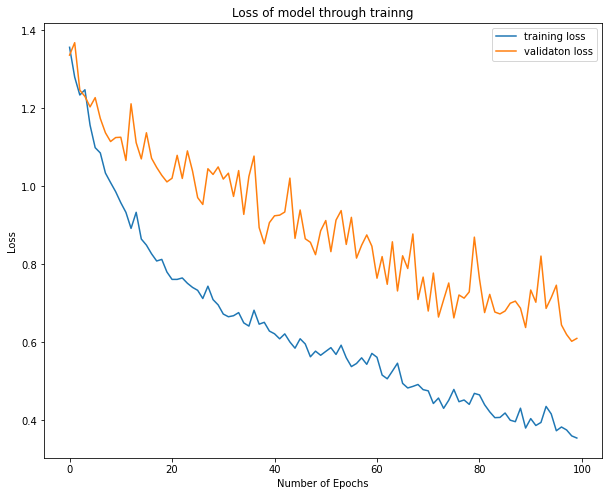

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss of model through trainng')
plt.plot(range(100), loss, label='training loss')
plt.plot(range(100), val_loss, label='validaton loss')
plt.legend(loc='upper right')
plt.show()

#As we can see, the error of the validation set ended up increasing towards the end


In [ ]:
#Next Steps

#Now that I have noticed that the model had overfitting, I need to adjust the architecture of the CNN 
#I will now create another model to compare, and tune the model based on its hyperparamters

#Things to consider changing:

#epochs - 100 epochs may have been too many run throughs for the training set, hence leading to overfitting

#callback - I will make sure to add an EarlyStopping callback function in the next model to stop the training process
#when the model starts to overfit

#CNN architecture
    #Number of layers - look to reduce the number of layers overall in the CNN, more layers means more pass throughs, 
    #and could add extra bias to weights

    #Dropout % - look into tweaking the dropout layer to turn off more nodes to allow for equal training along the whole network

    #Pooling Size - the pooling size was set to the default size of (2,2). This may have been too small and may have led to overfitting
    #as it could have been convoluting the training image too many times

In [ ]:
#Experiment with a new model

model_2 = Sequential([
                      
#ConvLayer - Input
tf.keras.layers.Conv2D(128, 4, input_shape=(img_shape, img_shape, 3), padding='same', activation='relu'),

#MaxPoolLayer
tf.keras.layers.MaxPool2D(pool_size=(3, 3)),


#ConvLayer
tf.keras.layers.Conv2D(256, 5, padding='same', activation='relu'),
#MaxPoolLayer
tf.keras.layers.MaxPool2D(pool_size=(3,3)),



#ConvLayer
tf.keras.layers.Conv2D(512, 6,  padding='same', activation='relu'),
#MaxPoolLayer
tf.keras.layers.MaxPool2D(pool_size=(3,3)),


#Flatten
tf.keras.layers.Flatten(),
#DropoutLayer

tf.keras.layers.Dropout(0.5),


#Dense
tf.keras.layers.Dense(1024, activation='relu'),
#DropoutLayer



tf.keras.layers.Dropout(0.5),



#Dense
tf.keras.layers.Dense(4)

])

In [ ]:
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_img_gen, epochs=80, batch_size=batch_size, validation_data=valid_img_gen, steps_per_epoch=int(np.ceil(train_img_gen.n / float(batch_size))), validation_steps=int(np.ceil(valid_img_gen.n / float(batch_size))))

Epoch 1/80
12/12 [==============================] - 25s 2s/step - loss: 1.7717 - accuracy: 0.3169 - val_loss: 1.3690 - val_accuracy: 0.2967
Epoch 2/80
12/12 [==============================] - 23s 2s/step - loss: 1.3144 - accuracy: 0.3600 - val_loss: 1.3950 - val_accuracy: 0.2740
Epoch 3/80
12/12 [==============================] - 23s 2s/step - loss: 1.2425 - accuracy: 0.4175 - val_loss: 1.2988 - val_accuracy: 0.3386
Epoch 4/80
12/12 [==============================] - 23s 2s/step - loss: 1.1942 - accuracy: 0.4528 - val_loss: 1.2732 - val_accuracy: 0.4258
Epoch 5/80
12/12 [==============================] - 23s 2s/step - loss: 1.1324 - accuracy: 0.4950 - val_loss: 1.2660 - val_accuracy: 0.3944
Epoch 6/80
12/12 [==============================] - 23s 2s/step - loss: 1.0893 - accuracy: 0.5050 - val_loss: 1.1566 - val_accuracy: 0.4625
Epoch 7/80
12/12 [==============================] - 23s 2s/step - loss: 1.0402 - accuracy: 0.5311 - val_loss: 1.1725 - val_accuracy: 0.4729
Epoch 8/80
12/12 [==

In [ ]:
model_2_accuracy = history_2.history['accuracy']
model_2_val_accuracy = history_2.history['val_accuracy']

model_2_loss = history_2.history['loss']
model_2_val_loss = history_2.history['val_loss']

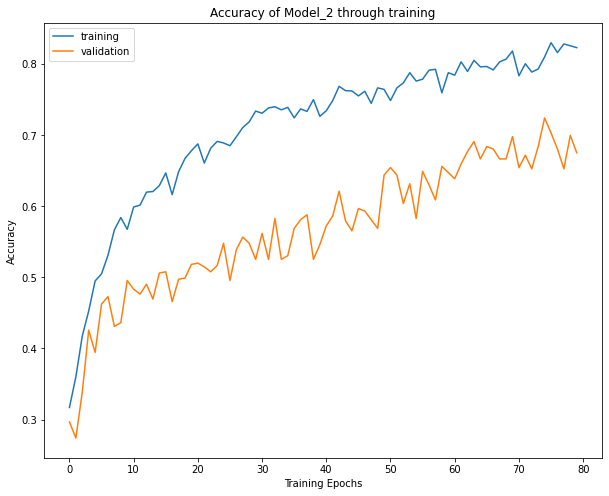

In [ ]:

plt.figure(figsize=(10, 8))
plt.title("Accuracy of Model_2 through training")
plt.xlabel('Training Epochs')
plt.ylabel("Accuracy")
plt.plot(range(80), model_2_accuracy, label="training")
plt.plot(range(80), model_2_val_accuracy, label="validation")
plt.legend(loc="upper left")
plt.show()

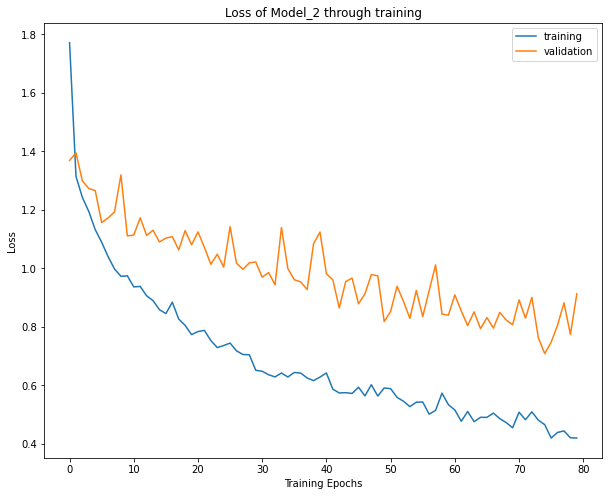

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Loss of Model_2 through training")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(range(80), model_2_loss, label='training')
plt.plot(range(80), model_2_val_loss, label='validation')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Third model

In [ ]:
model_3 = Sequential([
  tf.keras.layers.Conv2D(128, 4,  activation='relu', input_shape=(img_shape, img_shape, 3), padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3,3)),

  tf.keras.layers.Conv2D(256, 5, activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3,3)),

  tf.keras.layers.Conv2D(512, 5 ,activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3, 3)),


  tf.keras.layers.Conv2D(1024, 6, activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3, 3)),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(1024),

  tf.keras.layers.Dropout(0.5),


  tf.keras.layers.Dense(4)
  
])

In [ ]:
model_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_img_gen, epochs=150, batch_size=batch_size, validation_data=valid_img_gen,  steps_per_epoch=int(np.ceil(train_img_gen.n / float(batch_size))), validation_steps=int(np.ceil(valid_img_gen.n / float(batch_size))))

Epoch 1/150
12/12 [==============================] - 24s 2s/step - loss: 2.3403 - accuracy: 0.2843 - val_loss: 1.3657 - val_accuracy: 0.2880
Epoch 2/150
12/12 [==============================] - 23s 2s/step - loss: 1.3548 - accuracy: 0.2991 - val_loss: 1.3500 - val_accuracy: 0.2792
Epoch 3/150
12/12 [==============================] - 23s 2s/step - loss: 1.3315 - accuracy: 0.3195 - val_loss: 1.3562 - val_accuracy: 0.3141
Epoch 4/150
12/12 [==============================] - 24s 2s/step - loss: 1.2685 - accuracy: 0.3909 - val_loss: 1.3093 - val_accuracy: 0.3752
Epoch 5/150
12/12 [==============================] - 23s 2s/step - loss: 1.1884 - accuracy: 0.4345 - val_loss: 1.2819 - val_accuracy: 0.3909
Epoch 6/150
12/12 [==============================] - 23s 2s/step - loss: 1.1397 - accuracy: 0.4754 - val_loss: 1.2227 - val_accuracy: 0.4363
Epoch 7/150
12/12 [==============================] - 24s 2s/step - loss: 1.0906 - accuracy: 0.5107 - val_loss: 1.2368 - val_accuracy: 0.4328
Epoch 8/150
1

In [ ]:
model_3_accuracy = history_3.history['accuracy']
model_3_val_accuracy = history_3.history['val_accuracy']

model_3_loss = history_3.history['loss']
model_3_val_loss = history_3.history['val_loss']

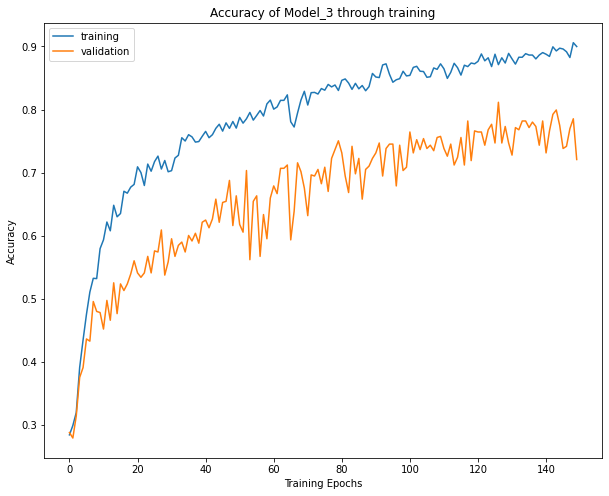

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Accuracy of Model_3 through training")
plt.xlabel('Training Epochs')
plt.ylabel("Accuracy")
plt.plot(range(150), model_3_accuracy, label="training")
plt.plot(range(150), model_3_val_accuracy, label="validation")
plt.legend(loc="upper left")
plt.show()

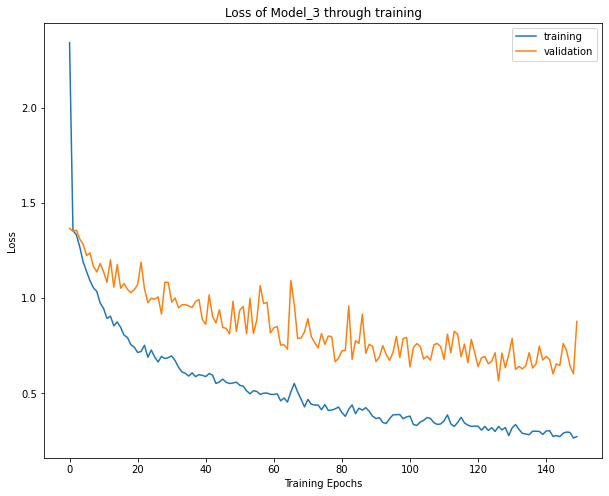

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Loss of Model_3 through training")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(range(150), model_3_loss, label='training')
plt.plot(range(150), model_3_val_loss, label='validation')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model_4 = Sequential([
  tf.keras.layers.Conv2D(128, 4,  activation='relu', input_shape=(img_shape, img_shape, 3), padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3,3)),

  tf.keras.layers.Conv2D(256, 5, activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3,3)),

  tf.keras.layers.Conv2D(512, 5 ,activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3, 3)),


  tf.keras.layers.Conv2D(1024, 6, activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(pool_size=(3, 3)),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(1024, activation='relu'),

  tf.keras.layers.Dropout(0.5),


  tf.keras.layers.Dense(4)
  
])

In [ ]:
model_4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_img_gen, epochs=200, batch_size=batch_size, validation_data=valid_img_gen,  steps_per_epoch=int(np.ceil(train_img_gen.n / float(batch_size))), validation_steps=int(np.ceil(valid_img_gen.n / float(batch_size))))

Epoch 1/200
12/12 [==============================] - 36s 2s/step - loss: 2.0050 - accuracy: 0.3120 - val_loss: 1.3744 - val_accuracy: 0.2880
Epoch 2/200
12/12 [==============================] - 24s 2s/step - loss: 1.3688 - accuracy: 0.3086 - val_loss: 1.3512 - val_accuracy: 0.2740
Epoch 3/200
12/12 [==============================] - 23s 2s/step - loss: 1.3176 - accuracy: 0.3636 - val_loss: 1.3586 - val_accuracy: 0.2845
Epoch 4/200
12/12 [==============================] - 23s 2s/step - loss: 1.2789 - accuracy: 0.3693 - val_loss: 1.2631 - val_accuracy: 0.3595
Epoch 5/200
12/12 [==============================] - 23s 2s/step - loss: 1.1932 - accuracy: 0.4479 - val_loss: 1.2555 - val_accuracy: 0.3944
Epoch 6/200
12/12 [==============================] - 23s 2s/step - loss: 1.1446 - accuracy: 0.4789 - val_loss: 1.2019 - val_accuracy: 0.4590
Epoch 7/200
12/12 [==============================] - 23s 2s/step - loss: 1.1398 - accuracy: 0.4748 - val_loss: 1.1783 - val_accuracy: 0.4346
Epoch 8/200
1

In [ ]:
model_4_accuracy = history_4.history['accuracy']
model_4_val_accuracy = history_4.history['val_accuracy']

model_4_loss = history_4.history['loss']
model_4_val_loss = history_4.history['val_loss']

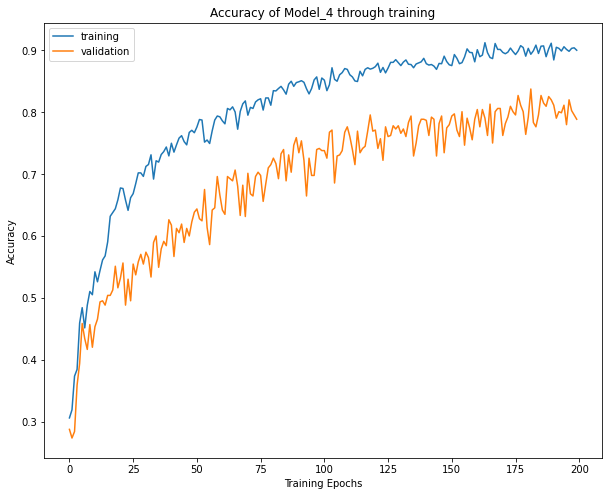

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Accuracy of Model_4 through training")
plt.xlabel('Training Epochs')
plt.ylabel("Accuracy")
plt.plot(range(200), model_4_accuracy, label="training")
plt.plot(range(200), model_4_val_accuracy, label="validation")
plt.legend(loc="upper left")
plt.show()

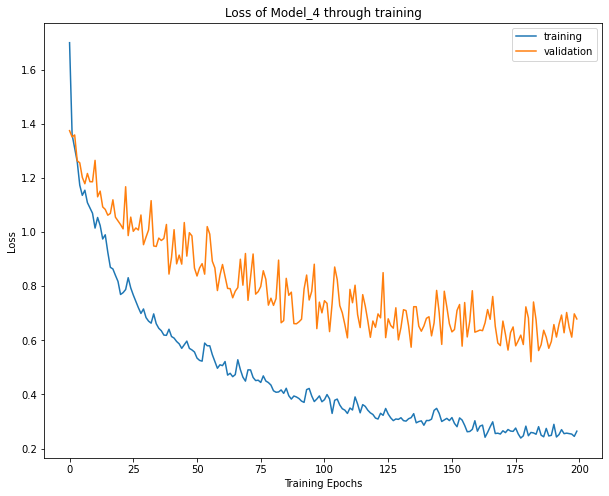

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Loss of Model_4 through training")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(range(200), model_4_loss, label='training')
plt.plot(range(200), model_4_val_loss, label='validation')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_4.predict(images, batch_size=10)
  print(np.argmax(classes[0]))

  